# Topics (related to the midterm project):

## 1. Regular Expression (regex, or sometimes RE)
## 2. return vs. yield
## 3. random.sample, numpy.random, and histogram plots 

## Regular expression


###"The limits of my language mean the limits of my world."  

###\- Ludwig Wittgenstein


Resources:

* *Effective Computation in Physics * Chapter 8

* https://docs.python.org/2/library/re.html

### re.match(pattern, string, flags=0)


###pattern:	This is the regular expression to be matched.

###string:	This is the string, which would be searched to match the pattern at the beginning of string.

###flags:	You can specify different flags, e.g., to do case insensitive search, use flags = re.I (for all flags: https://docs.python.org/2/howto/regex.html)


### The match() function returns a match object on success, None on failure.  

### Use group(num) or groups() function of match object to get matched expression.


###*Note: match() checks for a match only at the beginning of the string*

In [1]:
# A match!
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015-12-16')
print m
print m.group()

2015-12-16


In [2]:
# A match!  [0-9] --> \d
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9]\d", '2015-12-16')
print m
print m.group()

2015-12-16


In [3]:
# No match
import re
m = re.match("20[01][0-9].*[0-9][ 0-9].*[0-9][0-9]", '20')
print m

None


In [4]:
# match or not?  '2015-12-16' --> '2015a12b16'
import re
m = re.match("20[01][0-9].*[ 0-9][ 0-9].*[0-9][0-9]", '2015a12b16')
if m:
    print m.group()

2015a12b16


In [5]:
# match or not?  second '.*' --> [^a-z]
import re
m = re.match("20[ 01][ 0-9].*[0-9][0-9][^a-z][0-9][0-9]", '2015a12b16')
if m:
    print m.group()
else:
    print 'no match'

no match


In [6]:
# match or not?  [^a-z] --> [^a]
import re
m = re.match("20[ 01][ 0-9].*[0-9][0-9][^a][0-9][0-9]", '2015a12b16')
if m:
    print m.group()
else:
    print 'no match'

2015a12b16


In [7]:
# match or not?
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2019adlkfj are1216')
if m:
    print m.group()
else:
    print 'no match'

2019adlkfj are1216


In [9]:
# match or not?
import re
m = re.match(" 20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015^12&16')
if m:
    print m.group()
else:
    print 'no match'

2015^12&16


In [10]:
# match or not?
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
if m:
    print m.group()
else:
    print 'no match'

no match


In [11]:
# match or not?
import re
m = re.match(".*20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
if m:
    print m.group()
else:
    print 'no match'

Something very intereting will happen on 2015-12-16


In [12]:
# Match or not?
import re
m = re.match(".*20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015.12.16.  You just wait and see.') #dash does not match dot
print m

None


## re.search()

### If you want to locate a match anywhere in string, use search()

In [ ]:
import re
m = re.search("20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
print m
print m.group()

In [13]:
# the .group() method, and note: the second occurrence was ignored.
import re
m = re.search("(20[01][0-9])-([0-9][0-9])-([0-9][0-9])", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see, only after 2015-12-16.')
print m.group()
print m.group(0) #group(0) is the total group: group() = group(0)
print 'year:', m.group(1)
print 'month:', m.group(2)
print 'date:', m.group(3)

#stops looking once a match is made
#to continue looking, use findall() 

2015-12-16
2015-12-16
year: 2015
month: 12
date: 16


## re.search()

### To find all occurrences, and return the results as a list

In [1]:
# Match!
import re
m = re.findall("20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see, only after 2015-12-18.')
print m, type(m)

['2015-12-16', '2015-12-18'] <type 'list'>


## Breakout Problem:

### The following text is copied from wikipedia,

### "The current men's world record is 9.58 seconds, set by Jamaica's Usain Bolt in 2009,"

### By using re.match(), extract the world record time.  You cannot use any actual words in your pattern, e.g. "seconds" would not be allowed.



## return vs. yield

In [15]:
# A peculiar thing about enumerate(): you can't use len() with enumerate()!
from collections import Iterable
y = range(10)
print len(y)
print isinstance(y, Iterable)
print 'y[3]', y[3]

z = enumerate(range(10))
print isinstance(z, Iterable)
#print len(z)                     # will get error.
print z.next()
print z.next()
print 'z[3]', z[3] #
#print z[3]                      # will also get error.

10
True
y[3] 3
True
(0, 0)
(1, 1)
z[3]

TypeError: 'enumerate' object has no attribute '__getitem__'

## eunmerate() *is* an iterable; but not all iterables have a length!

In [17]:
# return:
def create_integers(N):
    lst=[]
    for i in range(N):
        lst.append(i)
    return lst
newints = create_integers(6)    
print newints 


[0, 1, 2, 3, 4, 5]


In [18]:
print type(create_integers), type(newints)


<type 'function'> <type 'list'>


In [36]:
# yield:
from pdb import set_trace
def generate_integers(N):
    for i in range(N):
        # note: it's inside the for loop!
        yield i
        #set_trace()
        print 'The {:d}th time generate_integers() is called'.format(i+1)
gen = generate_integers(6)
print type(generate_integers), type(gen)


<type 'function'> <type 'generator'>


In [37]:
# It shows you that the next generate_integers() is called, 
# python starts from the statement immediately below the yield statement.
gen.next()

0

In [38]:
for i in range(6):
    print gen.next()


The 1th time generate_integers() is called
1
The 2th time generate_integers() is called
2
The 3th time generate_integers() is called
3
The 4th time generate_integers() is called
4
The 5th time generate_integers() is called
5
The 6th time generate_integers() is called


StopIteration: 

In [ ]:
# You will get error if the previous cell has been run.
for i in range(6):
    print gen.next()

##Breakout Problem: Write a function that generates all Fibonacci numbers less than 300 by using yield.  

Definition: F\_n = F\_{n-1} + F\_{n-2}; F\_0 = 0 and F\_1 = 1.  

Hint: Once you have calculated F\_3, you have no need for F\_0 and F\_1; 
once you know F\_4, you have no need for F\_3 and F\_2; and so forth.
So for every new round, you only need to keep the previous two numbers.

Computing by hand:
F\_0 = 0
F\_1 = 1
F\_2 = 1
F\_3 = 2
...


In [52]:
def fib(n):
    var1 = 0
    var2 = 1
    for i in range(n):
        yield var1 
        var1_og = var1
        var1 = var2
        var2 = var1_og + var2
        
gen = fib(10)
print gen.next()


0


In [57]:
print gen.next()

5


In [ ]:
ind = 0
for i in fib():
    #print 'ind = ', ind
    ind += 1
    if i > 300:
        break
    else:
        print i
        
# Let's work out the flow of the code.
# This is an elegant, memory efficient way of generating Fibonacci numbers 
# (note: at any time only the latest two Fibonacci numbers take up memory, 
# as is necessary for the calculation of the next Fib number.   
# All previous Fib numbers are "forgotten"!)
# This is very different from the "list" way of doing things, where every element 
# takes up memory.


## The random module

from http://docs.python.org/2/library/random.html:

In [1]:
import random
lst = ['a', 'b', 'c', 'd', 'x', 'y', 'z']
random.shuffle(lst)   ### this shuffles the list in place.  
print lst   ### you can run this as many times as you want.
#changes the existing object
#does not create a new object/list 

['y', 'c', 'a', 'b', 'z', 'd', 'x']


In [2]:
import random 
random.random()

0.5404298146714666

##random.sample(population, k)

Return a k length list of unique elements chosen from the population sequence. 

Returns a new list containing elements from the population while leaving the original population unchanged. 


In [6]:
# Example of random.sample:
from random import sample
print sample(xrange(10000000), 10)
# Note the difference between xrange() and range(): xrange() doesn't create an entire list, 
# but creates the values when asked for them.
# So it's much better to use xrange() here owing to the large argument.

[7225965, 4010124, 8394283, 9819111, 2605122, 3943453, 2780271, 9015186, 9623191, 3280320]


In [7]:
### Another example: 
from string import ascii_lowercase
print type(ascii_lowercase), len(ascii_lowercase)
# So yes, you can only import modules, functions but also strings and other objects.
# In Python: almost everything is an object (modules, functions, strings, ints, floats,
# dictionaries, lists, classes, etc.)
# and therefore, there is no fundamental difference between them in terms of how they
# are treated and used in Python.
print ascii_lowercase
print sample(ascii_lowercase, 10)

<type 'str'> 26
abcdefghijklmnopqrstuvwxyz
['g', 'q', 'd', 'b', 'x', 'v', 'z', 'p', 'r', 's']


## ASCII stands for: American Standard Code for Information Interchange

## numpy.random

http://docs.scipy.org/doc/numpy/reference/routines.random.html

Gaussian distribution -- mu is the mean, and sigma is the standard deviation. 

In [8]:
from numpy.random import randn #randn() gives guassian distribution with standard deviation of 1 around 0
x = randn()
print x

-1.93192858848


In [10]:
from numpy.random import rand
x = rand()
print x

0.738269482034


In [11]:
import numpy as np
from numpy.random import randn
x = randn(10)*2. + 3.
print x
print np.mean(x)
print np.std(x)

[ 3.39301379  0.99996989  3.41786441  3.85919242  3.65946238  5.0766393
  5.85473445  2.11629948  1.68443272  6.11396462]
3.61755734485
1.62354185371


n (normalized height, or probability density): [  8.52749963e-05   8.52749963e-05   2.13187491e-04   2.13187491e-04
   1.70549993e-04   2.13187491e-04   4.69012480e-04   9.38024959e-04
   1.23648745e-03   1.74813742e-03   2.72879988e-03   2.68616238e-03
   4.90331229e-03   5.67078725e-03   8.78332462e-03   1.09578370e-02
   1.24501495e-02   1.39850994e-02   1.77371992e-02   1.94000617e-02
   2.46444739e-02   2.24699615e-02   2.58383239e-02   2.61367864e-02
   2.57530489e-02   2.58809614e-02   2.54972239e-02   2.43460114e-02
   2.07218241e-02   1.99543491e-02   1.73534617e-02   1.47952119e-02
   1.17679495e-02   9.80662457e-03   7.12046219e-03   5.15913728e-03
   3.75209984e-03   3.06989987e-03   2.72879988e-03   1.70549993e-03
   9.80662457e-04   8.10112465e-04   5.54287476e-04   3.41099985e-04
   1.70549993e-04   1.70549993e-04   4.26374982e-05   8.52749963e-05
   0.00000000e+00   4.26374982e-05] 50
bins (locations of bin edges): [  42.78962089   45.13497426   47.48032763   49.825681 

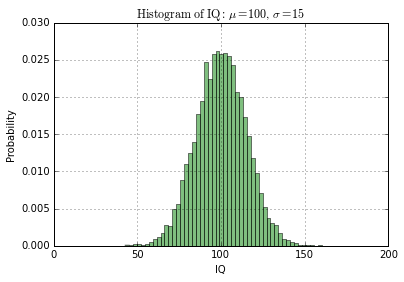

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.random.randn(10000)*15 + 100
fig = plt.figure()
ax = fig.add_subplot(111)

# the histogram of the data

Nbins = 50
# normed=1: the total area adds up to 1; # alpha: level of tranparency.
n, bins, patches = ax.hist(x, Nbins, normed=1, facecolor='green', alpha=.5)
print 'n (normalized height, or probability density):', n, len(n)
print 'bins (locations of bin edges):', bins, len(bins)

# hist uses np.histogram under the hood to create 'n' and 'bins'.
# np.histogram returns the bin edges, so there will be Nbin probability
# density values (n), Nbin+1 bin edges (bins), and finally, Nbin patches.

ax.set_xlabel('IQ')
ax.set_ylabel('Probability')
# The is Latex, a typsetting "program".
ax.set_title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
# Pay attention to how the x and y axis limits are set.
ax.set_xlim(0, 200)
ax.set_ylim(0, 0.03)
ax.grid(True)

plt.show()


## End of wk 6-1